<a href="https://colab.research.google.com/github/gkdivya/EVA/blob/master/Architectural%20Basics/DNN_All_Iterations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Architectural Basics**
##**Building a deep Neural network**

In this notebook, let's see how to build a neural network from scratch for MNIST image classification and how we can tune our architecture to optimize our network better step by step.  



**Import Libraries and Modules**

In [0]:
# https://keras.io/
# Importing Keras library
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np
# Importing Keras classes used for building CNN
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
# Importing Keras Inbuilt dataset
from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)


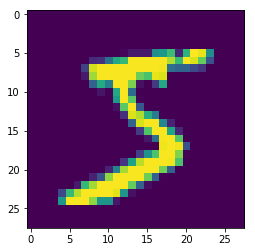

In [0]:
print (X_train.shape)
#Visualize one image in training set
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

### Preprocessing data

In [0]:
#Reshaping to hold the no of channels
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
#Data converted to float and performed Image standardization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
#Train Labels
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

**One Hot Encoding**



In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
#Train Labels after one hot encoding, for example 5 is converted as [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

#**Iteration 1**
##**How we define a vanila neural network for our classification problem**

**Convolution Blocks & Transition Blocks**
*   We will start building our network by deciding how many convolution blocks we need based on our input image size and the size of the object we are trying to predict in the image
*   And we will decide where we will place our transition blocks (Max pooling and 1x1 block) in our architecture
*   We will have convolution blocks followed by transition blocks till we reach our recptive field. 

**Kernels**
*   We will decide the number of kernels used 
*   We keep increasing our no of kernels until we perform max pooling followed by pointwise convolution

**Max Pooling**
*   We make sure max pooling is 2 or more layers away from output





In [0]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(16, (3, 3), activation='relu', input_shape=(28,28,1))) # 26

model.add(Convolution2D(16, (3, 3), activation='relu')) # 24
model.add(Convolution2D(32, (3, 3), activation='relu')) # 22

model.add(MaxPooling2D(pool_size=(2, 2))) # 11
model.add(Convolution2D(16, (1, 1), activation='relu')) # 11

model.add(Convolution2D(16, (3, 3), activation='relu')) # 9
model.add(Convolution2D(16, (3, 3), activation='relu')) # 7
model.add(Convolution2D(16, (3, 3), activation='relu'))#5

model.add(Convolution2D(16, 1, activation='relu')) #5
model.add(Convolution2D(10, 5))
model.add(Flatten())
model.add(Activation('softmax'))


W0828 16:34:40.561984 139904771368832 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0828 16:34:40.611366 139904771368832 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0828 16:34:40.621373 139904771368832 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0828 16:34:40.701303 139904771368832 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 16)        2320      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 16)        528       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 9, 9, 16)          2320      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 7, 7, 16)          2320      
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
model.fit(X_train, Y_train, batch_size=128, epochs=30, verbose=1)
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

W0828 16:34:40.832998 139904771368832 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0828 16:34:40.875138 139904771368832 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.

W0828 16:34:41.090123 139904771368832 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0828 16:34:41.198498 139904771368832 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated

Epoch 1/30
60000/60000 [==============================] - 16s 259us/step - loss: 0.3590 - acc: 0.8842
Epoch 2/30
60000/60000 [==============================] - 7s 116us/step - loss: 0.1020 - acc: 0.9693
Epoch 3/30
60000/60000 [==============================] - 7s 116us/step - loss: 0.0712 - acc: 0.9782
Epoch 4/30
60000/60000 [==============================] - 7s 116us/step - loss: 0.0592 - acc: 0.9818
Epoch 5/30
60000/60000 [==============================] - 7s 115us/step - loss: 0.0481 - acc: 0.9853
Epoch 6/30
60000/60000 [==============================] - 7s 115us/step - loss: 0.0424 - acc: 0.9869
Epoch 7/30
60000/60000 [==============================] - 7s 115us/step - loss: 0.0380 - acc: 0.9881
Epoch 8/30
60000/60000 [==============================] - 7s 115us/step - loss: 0.0343 - acc: 0.9892
Epoch 9/30
60000/60000 [==============================] - 7s 116us/step - loss: 0.0310 - acc: 0.9901
Epoch 10/30
60000/60000 [==============================] - 7s 115us/step - loss: 0.0287 - 

## Observation

Achieved Validation Accuracy: 98.85, but Training Accuracy was 99.68.

Model seems to overfit the training data.

Few regularizations and batch normalization could be introduced to generalize the data better

#**Iteration 2**
##**Improvement**

*   Batch Normalization
    - We have standardized our inputs by dividing it by 255, but when we are convolving the values again in our network, we are getting values which are not ranging from 0 to 1. Different layers are getting values in different range. So its better to introduce Batch normalization after we perform our convolution each time.
    
    - Moreover during backpropagation, neural networks can be generalized better when the distribution of values are normalized.
     


In [0]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(16, (3, 3), activation='relu', input_shape=(28,28,1))) # 26
model.add(BatchNormalization())

model.add(Convolution2D(16, (3, 3), activation='relu')) # 24
model.add(BatchNormalization())
model.add(Convolution2D(32, (3, 3), activation='relu')) # 22
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2))) # 11
model.add(Convolution2D(16, (1, 1), activation='relu')) # 11
model.add(BatchNormalization())

model.add(Convolution2D(16, (3, 3), activation='relu')) # 9
model.add(BatchNormalization())
model.add(Convolution2D(16, (3, 3), activation='relu')) # 7
model.add(BatchNormalization())
model.add(Convolution2D(16, (3, 3), activation='relu')) # 5
model.add(BatchNormalization())

model.add(Convolution2D(16, 1, activation='relu')) #7
model.add(BatchNormalization())
model.add(Convolution2D(10, 5))
model.add(Flatten())
model.add(Activation('softmax'))

W0828 16:38:19.412393 139904771368832 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:1834: The name tf.nn.fused_batch_norm is deprecated. Please use tf.compat.v1.nn.fused_batch_norm instead.



In [0]:
model.summary()
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
model.fit(X_train, Y_train, batch_size=32, epochs=30, verbose=1)
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 16)        64        
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 24, 24, 16)        2320      
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 16)        64        
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 22, 22, 32)        4640      
_________________________________________________________________
batch_normalization_3 (Batch (None, 22, 22, 32)        128       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 11, 32)        0         
__________



##Observation:


1.   Adding Batch Normalization increases the accuracy meanwhile it increases the epoch time
2.   But the gap between the test accuracy(99.31) and train accuracy(99.72) is more


#**Iteration 3**

*  Adding any regularization method, will help in avoiding overfitting the data, Adding Dropout in the next iteration


In [0]:
from keras.layers import Activation
model = Sequential()

model.add(Convolution2D(10, 3, 3, activation='relu', input_shape=(28,28,1))) # 26
model.add(BatchNormalization())

model.add(Convolution2D(16, 3, 3, activation='relu')) # 24
model.add(BatchNormalization())
model.add(Convolution2D(32, 3, 3, activation='relu')) # 22
model.add(BatchNormalization())

model.add(Dropout(0.25))

model.add(MaxPooling2D(pool_size=(2, 2))) # 11
model.add(Convolution2D(10, 1, 1, activation='relu')) # 11
model.add(BatchNormalization())

model.add(Convolution2D(16, 3, 3, activation='relu')) # 9
model.add(BatchNormalization())
model.add(Convolution2D(32, 3, 3, activation='relu')) # 7
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Convolution2D(10, 1, activation='relu')) #7

model.add(Convolution2D(10, 7))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  if __name__ == '__main__':
W0828 17:02:28.351738 139904771368832 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
/usr/local/lib/python

In [0]:
model.summary()
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
model.fit(X_train, Y_train, batch_size=128, nb_epoch=30, verbose=1)
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 26, 26, 10)        100       
_________________________________________________________________
batch_normalization_9 (Batch (None, 26, 26, 10)        40        
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 24, 24, 16)        1456      
_________________________________________________________________
batch_normalization_10 (Batc (None, 24, 24, 16)        64        
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 22, 22, 32)        4640      
_________________________________________________________________
batch_normalization_11 (Batc (None, 22, 22, 32)        128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 22, 22, 32)        0         
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


Epoch 1/30
60000/60000 [==============================] - 12s 204us/step - loss: 0.2680 - acc: 0.9152
Epoch 2/30
60000/60000 [==============================] - 10s 170us/step - loss: 0.0646 - acc: 0.9805
Epoch 3/30
60000/60000 [==============================] - 10s 172us/step - loss: 0.0482 - acc: 0.9850
Epoch 4/30
60000/60000 [==============================] - 10s 171us/step - loss: 0.0411 - acc: 0.9866
Epoch 5/30
60000/60000 [==============================] - 10s 170us/step - loss: 0.0350 - acc: 0.9889
Epoch 6/30
60000/60000 [==============================] - 10s 169us/step - loss: 0.0298 - acc: 0.9901
Epoch 7/30
60000/60000 [==============================] - 10s 170us/step - loss: 0.0295 - acc: 0.9904
Epoch 8/30
60000/60000 [==============================] - 10s 171us/step - loss: 0.0260 - acc: 0.9914
Epoch 9/30
60000/60000 [==============================] - 10s 170us/step - loss: 0.0233 - acc: 0.9927
Epoch 10/30
60000/60000 [==============================] - 10s 170us/step - loss: 

In [0]:
y_pred = model.predict(X_test)

In [0]:
print(y_pred[:9])
print(y_test[:9])

[[1.58555454e-14 9.48063676e-13 2.90500735e-09 1.34341106e-11
  1.35577487e-18 2.92705682e-15 1.00463815e-22 1.00000000e+00
  5.80136593e-14 1.74355475e-10]
 [3.97990335e-10 1.40519516e-08 9.99998927e-01 6.31750430e-10
  9.61809634e-18 3.05956143e-19 1.12694909e-06 3.17335168e-14
  2.20181967e-12 2.13421697e-18]
 [7.58922647e-11 9.99999881e-01 1.24514588e-09 8.95473105e-12
  5.96020733e-10 3.40553452e-09 3.10150376e-08 1.18460562e-07
  6.02802641e-10 7.01641037e-11]
 [1.00000000e+00 2.26552430e-15 1.43059439e-10 4.00222661e-14
  6.07058730e-15 4.56064562e-14 1.61832805e-08 1.00587712e-14
  1.18887734e-12 4.06438034e-12]
 [2.25019398e-13 3.74528436e-10 2.07378364e-12 2.42333111e-14
  9.99999404e-01 4.85503351e-16 2.88662670e-11 6.85269549e-11
  3.12276122e-10 6.55068504e-07]
 [3.28769347e-13 9.99999642e-01 6.96064206e-10 1.36352152e-13
  1.40982032e-10 1.20009918e-13 1.98909458e-10 3.18999014e-07
  2.17447345e-11 1.38789345e-11]
 [3.45235905e-18 4.47590798e-10 1.42565508e-11 5.17153662e

##Observation:


1.   Adding Batch Normalization increases the accuracy meanwhile it increases the epoch time
2.   But the gap between the test accuracy(99.31) and train accuracy(99.72) is more


#**Iteration 4**

*    Reducing paramters under 15K - Since its a small dataset, reduing the number of kernels used
*   Instead of adding a dropout of 0.25, more dropouts of 0.1 are introduced. 
*   List item
*   List item





In [34]:
from keras.layers import Activation
model = Sequential()
 
model.add(Convolution2D(8, 3, 3, activation='relu', input_shape=(28,28,1))) #26
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(16, 3, 3, activation='relu')) #24
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(16, 3, 3, activation='relu'))#22
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Convolution2D(16, 1, 1, activation='relu')) #22
model.add(MaxPooling2D(pool_size=(2, 2)))#11

model.add(Convolution2D(8, 3, 3, activation='relu'))#9
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(16, 1, 1, activation='relu')) #9


model.add(Convolution2D(16, 3, 3, activation='relu'))#7
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Convolution2D(16, 3, 3, activation='relu'))#5
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Convolution2D(10, 5, 5))

model.add(Flatten())
model.add(Activation('softmax'))


model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (1, 1), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: Update your 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_96 (Conv2D)           (None, 26, 26, 8)         80        
_________________________________________________________________
batch_normalization_61 (Batc (None, 26, 26, 8)         32        
_________________________________________________________________
dropout_49 (Dropout)         (None, 26, 26, 8)         0         
_________________________________________________________________
conv2d_97 (Conv2D)           (None, 24, 24, 16)        1168      
_________________________________________________________________
batch_normalization_62 (Batc (None, 24, 24, 16)        64        
_________________________________________________________________
dropout_50 (Dropout)         (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_98 (Conv2D)           (None, 22, 22, 16)        2320      
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:37: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (5, 5))`


In [35]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

callbacks=[LearningRateScheduler(scheduler, verbose=1)]

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=128, epochs=30, verbose=1, callbacks=callbacks, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
60000/60000 [==============================] - 18s 302us/step - loss: 0.2271 - acc: 0.9272 - val_loss: 0.0651 - val_acc: 0.9791
Epoch 2/30

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
60000/60000 [==============================] - 12s 201us/step - loss: 0.0673 - acc: 0.9797 - val_loss: 0.0704 - val_acc: 0.9771
Epoch 3/30

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
60000/60000 [==============================] - 12s 192us/step - loss: 0.0496 - acc: 0.9844 - val_loss: 0.0335 - val_acc: 0.9897
Epoch 4/30

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
60000/60000 [==============================] - 11s 191us/step - loss: 0.0428 - acc: 0.9866 - val_loss: 0.0346 - val_acc: 0.9886
Epoch 5/30

Epoch 00005: LearningRateScheduler setting learning rate to 0.0013181019.
60000/60000 [==

In [36]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.025836447957489874, 0.9924]
